In [4]:
%matplotlib inline
from __future__ import division
from vis_common import load_frame, STORE
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

f = load_frame(mini=True, include=['saw_'])
ilost = STORE['ilost']
iwon = STORE['iwon']
iquit = STORE['iquit']

In [17]:
f['sbranches_seen'] = f[['saw_snake', 'saw_spider', 'saw_swamp', 'saw_shoals']].sum(axis=1)
both_seen = f['sbranches_seen'] == 2
print "{} games where two s-branches were seen".format(both_seen.sum())
# You're *supposed* to get swamp xor shoals, spider xor snake
too_many = f['sbranches_seen'] > 2
print "{} games where more than 2 were seen".format(too_many.sum())
weird_pairs = both_seen & (
    (f['saw_swamp'] & f['saw_shoals'])
    | (f['saw_snake'] & f['saw_spider'])
)
print "{} games with illegal s-branch combos".format(weird_pairs.sum())
# TODO: Maybe an artifact of 0.10? Spider's nest was only made a rune branch in 0.11. Try excluding .10

s_branch_wr = f[both_seen & ~weird_pairs].groupby(['saw_snake', 'saw_spider', 'saw_swamp', 'saw_shoals'])['won'].mean()
s_branch_wr

14094 games where two s-branches were seen
97 games where more than 2 were seen
382 games with illegal s-branch combos


saw_snake  saw_spider  saw_swamp  saw_shoals
False      True        False      True          0.114749
                       True       False         0.120244
True       False       False      True          0.117277
                       True       False         0.121044
Name: won, dtype: float64

In [15]:
f[f['sbranches_seen'] == 2].groupby(['saw_snake', 'saw_spider', 'saw_swamp', 'saw_shoals']).size()

saw_snake  saw_spider  saw_swamp  saw_shoals
False      False       True       True           328
           True        False      True          3329
                       True       False         3285
True       False       False      True          3496
                       True       False         3602
           True        False      False           54
dtype: int64

In [56]:
s_branch_wr[0,1,1,0]


saw_snake  saw_spider  saw_swamp  saw_shoals
False      True        True       False         0.120244
True       False       True       False         0.121044
                       False      True          0.117277
False      True        False      True          0.114749
Name: won, dtype: float64

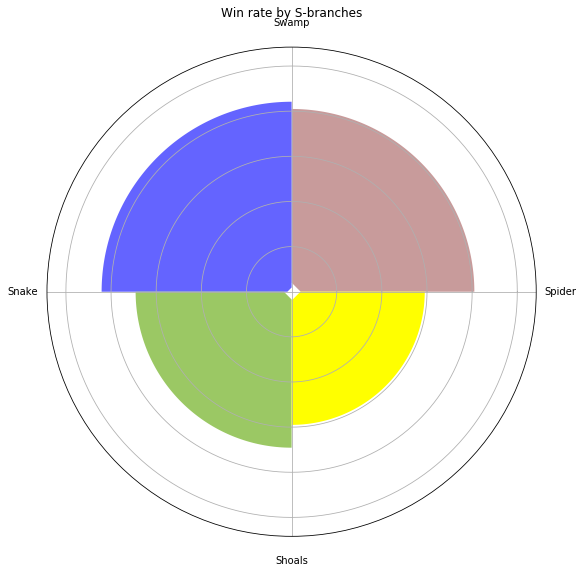

In [68]:
# omg let's make a poooolar chart!
L,R,U,D = map(lambda tup: np.asarray(tup)/255, 
    [
    (100, 0, 100), # L
    (200, 55, 0), # R
    (0, 100, 155), # U
    (55, 200, 0) # D
])
wr_index = map(tuple, [ [0,1,1,0], # Right, up
            [1, 0, 1, 0], # Left up
            [1, 0, 0, 1], # Left down
            [0, 1, 0, 1], # Right down
])
rei = s_branch_wr.reindex(wr_index)
colors = [R+U, L+U, L+D, R+D]
plt.subplots(figsize=(9,9))
ax = plt.subplot(projection='polar')
theta = np.linspace(0, 2*np.pi, 4, endpoint=False) + np.pi/4
bars = ax.bar(theta, rei.values, np.pi/2, 
              color=colors,
             )
ax.set_ylim(bottom=.1);
ax.set_xticks(theta+np.pi/4)
ax.set_yticklabels([]);
ax.set_xticklabels(['Swamp', 'Snake', 'Shoals', 'Spider']);
ax.set_title('Win rate by S-branches');
# TODO: Fill with gradient or pattern or something?